In [1]:
%load_ext autoreload
%autoreload 2
# add path to code
import sys
sys.path.insert(0, '../source')

In [2]:
import numpy as np
from constitutive import  D, Phi, dPhi,temp,sat,perm, sat_T, Phi_lens
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from params import alpha, N_sc, Tz_sc
from scipy.optimize import root_scalar

In [3]:
N = np.linspace(1e-3,40,1000)

Plot dimensional consolidation law for clarity:

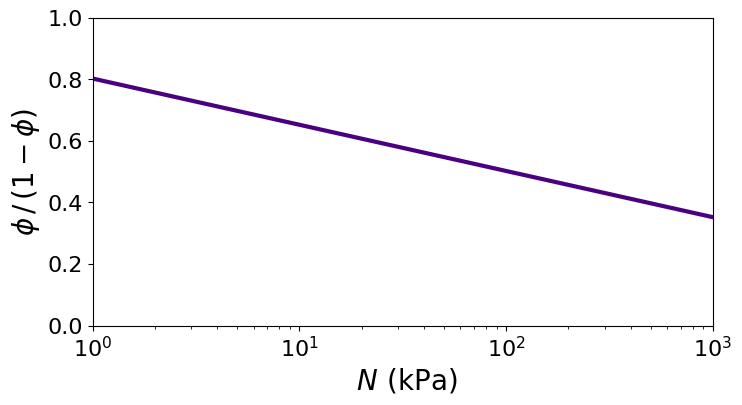

In [4]:
# # plot the (dimensional) consolidation law in log space
phi = Phi(N,log=np.log)
e = phi/(1-phi)

plt.figure(figsize=(8,4))
plt.plot(N*N_sc/1e3,e,linewidth=3,color='indigo')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$\phi\,/\,(1-\phi)$',fontsize=20)
plt.xlabel(r' $N$ (kPa)',fontsize=20)
plt.xlim(1e0,1e3)
plt.ylim(0,1)
plt.gca().set_xscale('log')
plt.show()

## Figure 2

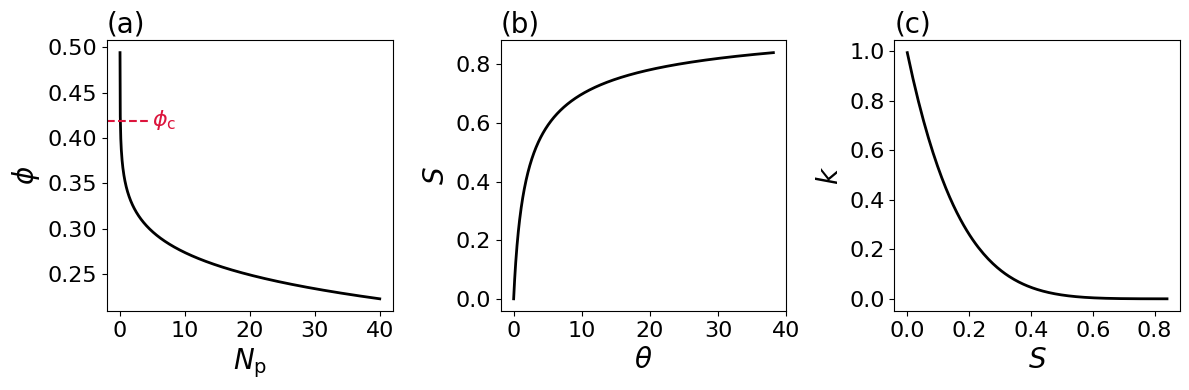

In [5]:
S = np.linspace(0,0.999,100)
phi_i = np.arange(0,1.1,0.25)
colors = pl.cm.cool_r(phi_i)
z = np.linspace(1e-3,20,1000)
phi_c = Phi(0.05,log=np.log)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title(r'(a)',fontsize=20,loc='left')
plt.plot(N,phi,linewidth=2,color='k')
plt.axhline(phi_c, xmax=0.15,linestyle='--',color='crimson')
plt.annotate(r'$\phi_\mathrm{c}$',xy=(5,0.413),fontsize=16,color='crimson')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$N_\mathrm{p}$',fontsize=20)
plt.ylabel(r'$\phi$',fontsize=20)
# plt.ylim(0,10)
plt.tight_layout()

plt.subplot(132)
plt.title(r'(b)',fontsize=20,loc='left')
plt.plot(temp(z),sat(temp(z)),linewidth=2,color='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\theta$',fontsize=20)
plt.ylabel(r'$S$',fontsize=20)
plt.tight_layout()

plt.subplot(133)
plt.title(r'(c)',fontsize=20,loc='left')
plt.plot(sat(temp(z)),perm(sat(temp(z))),linewidth=2,color='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$S$',fontsize=20)
plt.ylabel(r'$k$',fontsize=20)
plt.tight_layout()

plt.savefig('Fig2',bbox_inches='tight')
plt.show()

## Figure 3

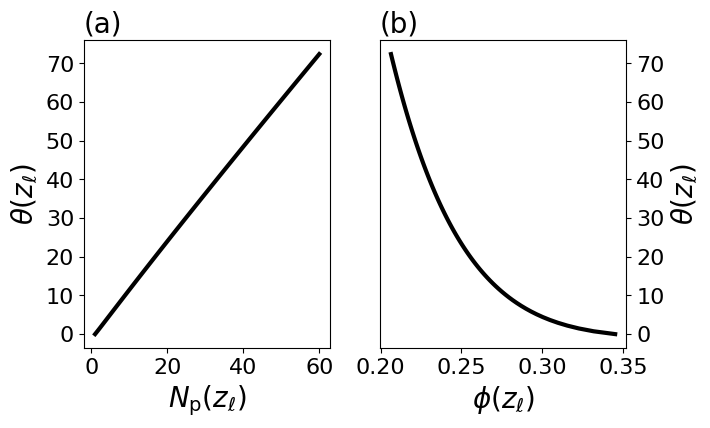

In [6]:
z_l = np.linspace(0,38,100)
phi_l = 0*z_l

for j in range(phi_l.size):
    phi_l[j] = Phi_lens(z_l[j])

plt.figure(figsize=(7,4))
plt.subplot(121)
plt.title(r'(a)',fontsize=20,loc='left')
N_l = (1-phi_l*sat(temp(z_l)))*(1+temp(z_l))
plt.plot(N_l,temp(z_l),color='k',linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$\theta(z_\ell)$',fontsize=20)
plt.xlabel(r'$N_\mathrm{p}(z_\ell)$',fontsize=20)

plt.subplot(122)
plt.title(r'(b)',fontsize=20,loc='left')
plt.plot(phi_l,temp(z_l),color='k',linewidth=3)
plt.xticks(fontsize=16)
plt.ylabel(r'$\theta(z_\ell)$',fontsize=20)
plt.xlabel(r'$\phi(z_\ell)$',fontsize=20)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right() 
plt.yticks(fontsize=16)
plt.savefig('Fig3',bbox_inches='tight')
plt.show()
plt.close()